In [2]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
print(os.listdir("data"))

['digit-recognizer.zip', 'Digit_test_prediction.csv', 'Digit_test_prediction123.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
data = pd.read_csv("data/train.csv")
testds = pd.read_csv("data/test.csv")

In [5]:
# no_col_train = len(data.columns)
# data.info()
# no_col_train

In [6]:
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
testds.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
class DigitMNISTds(Dataset):
     def __init__(self, file_path, 
                 transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), 
                     transforms.Normalize(mean=(0.5,), std=(0.5,))])
                ):
        
        df = pd.read_csv(file_path)
        
        if len(df.columns) == n_pixels:
            # test data
            self.X = df.values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = None
        else:
            # training data
            self.X = df.iloc[:,1:].values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = torch.from_numpy(df.iloc[:,0].values)
            
        self.transform = transform
    
     def __len__(self):
        return len(self.X)

     def __getitem__(self, idx):
        if self.y is not None:
            #for train
            return self.transform(self.X[idx]), self.y[idx]
        else:
            #for test
            return self.transform(self.X[idx])

In [12]:
batch_size = 64
n_test = len(testds)
n_pixels = len(testds.columns)
train_ds= DigitMNISTds('data/train.csv')

In [13]:
#test_ds= DigitMNISTDatasetTest(csv_file='data/test.csv')
test_ds = DigitMNISTds('data/test.csv', )

In [14]:
train_loader = DataLoader(dataset=train_ds,
                                           batch_size=batch_size,
                                           shuffle=True);


In [15]:
test_loader = DataLoader(dataset=test_ds,
                                           batch_size=batch_size,
                                           shuffle=True);

In [16]:
#Checking training data
for i,(image, lables) in enumerate(train_loader):
    print(i, image.size(), len(lables))
    break

0 torch.Size([64, 1, 28, 28]) 64


In [17]:
#Checking testing data
for image, lables in enumerate(test_loader):
    print(image)
    print(lables)
    break

0
tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1.

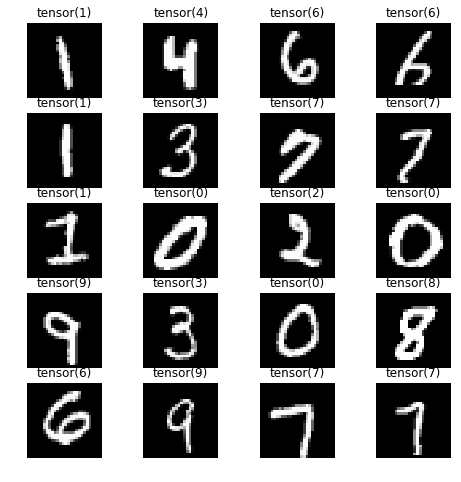

In [18]:
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_ds));
    img = train_ds[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    #plt.title(labels_map[train_ds[img_xy][1]])
    plt.title(train_ds[img_xy][1])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [20]:
class CNNModel(nn.Module):

    def __init__(self):

        super(CNNModel,self).__init__()

        self.conv1 = nn.Conv2d(1,10,5) 
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10,20,5)
        
        self.fc1 = nn.Linear(320,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,320)#flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [24]:
net = CNNModel()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,weight_decay= 1e-6, momentum = 0.9, nesterov = True)

In [27]:
for epoch in range(2):

    running_loss= 0.0

    for i,data in enumerate(train_loader,0):

        inputs, labels = data
        optimizer.zero_grad()

        # forward prop

        outputs = net(inputs)

        loss = loss_func(outputs, labels)

        # backprop

        loss.backward() # compute gradients
        optimizer.step() # update parameters

        # print statistics

        running_loss += loss.item()

        if i %2000==1999: # print every 2000 mini-batches

            print('[epoch: %d, minibatch: %5d] loss: %.3f'%(epoch +1, i +1, running_loss /2000))

            running_loss = 0.0

print("Training finished!")

Training finished!


In [31]:
def prediciton(data_loader):
    net.eval()
    test_pred = torch.LongTensor()
    
    for i, data in enumerate(data_loader):
        data = Variable(data, volatile=True)
                    
        output = net(data)
        
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
                
    return test_pred


test_pred = prediciton(test_loader)

out_df = pd.DataFrame(np.c_[np.arange(1, len(test_ds)+1)[:,None], test_pred.numpy()], 
                      columns=['ImageId', 'Label'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


In [32]:

out_df.head(30)

,ImageId,Label
0,1,0
1,2,2
2,3,0
3,4,4
4,5,8
5,6,7
6,7,5
7,8,2
8,9,8
9,10,7


In [33]:
out_df.to_csv('data/Digit_test_prediction123.csv', index=False)